# Linear Regression 


In [1]:
#  Employee data linear regression 

# reference the caret package (wrapper of many machine learning R algorithms)
library(caret) # caret also loads 2 packages: lattice and ggplot2

# Read CSV
df <- read.csv('HR_comma_sep.csv')

Loading required package: lattice
Loading required package: ggplot2


In [2]:
# explore the data
head(df,5)

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low


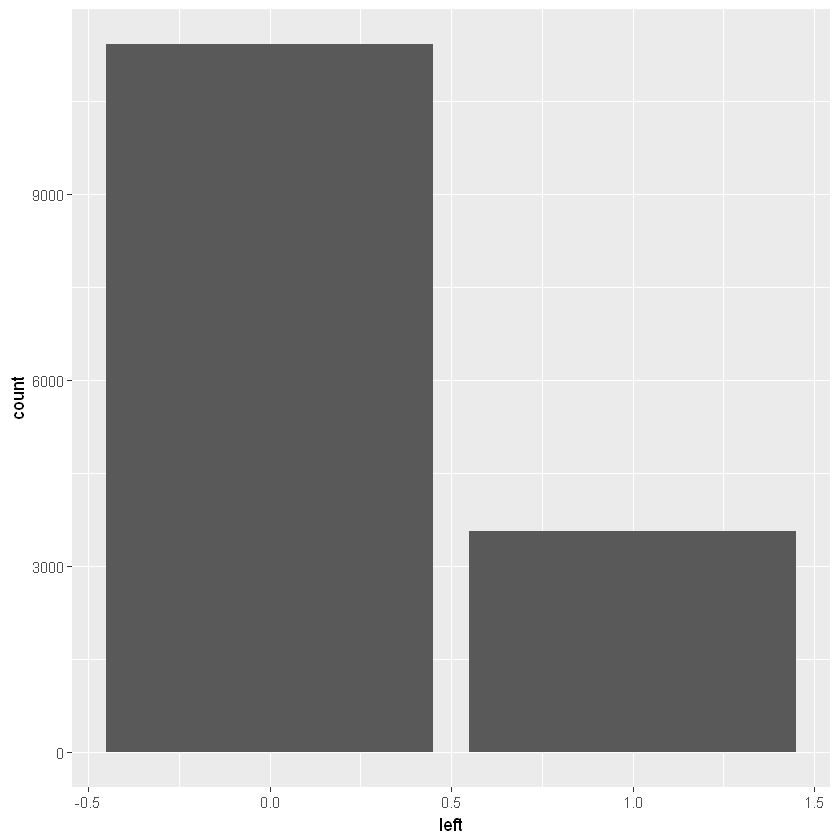

In [3]:
library(ggplot2)
ggplot(df,aes(left)) + geom_bar()

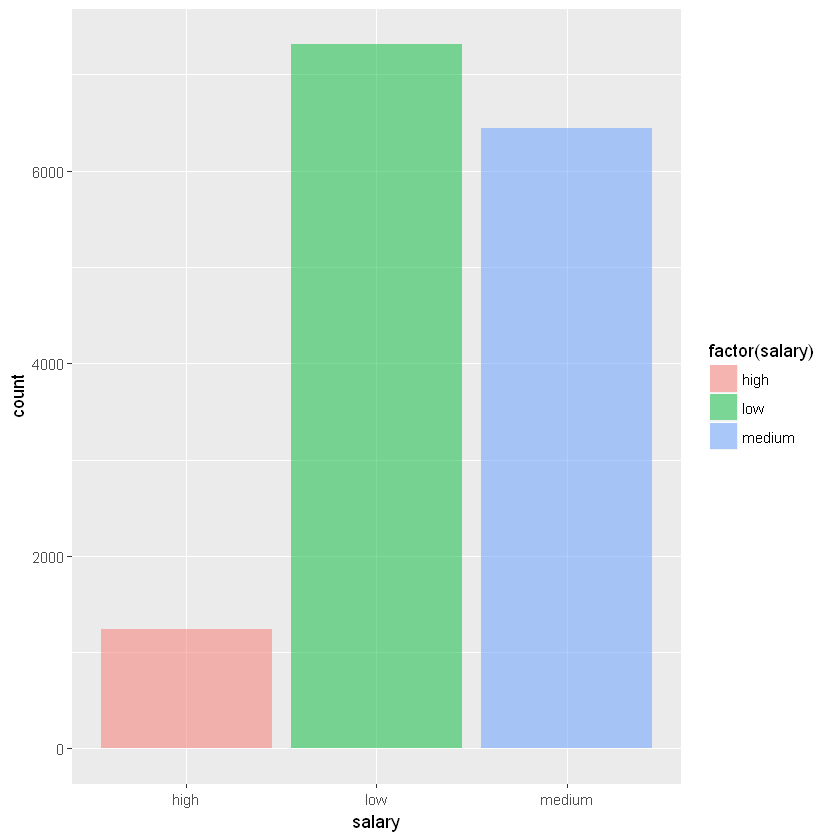

In [4]:
ggplot(df,aes(salary)) + geom_bar(aes(fill=factor(salary)),alpha=0.5)


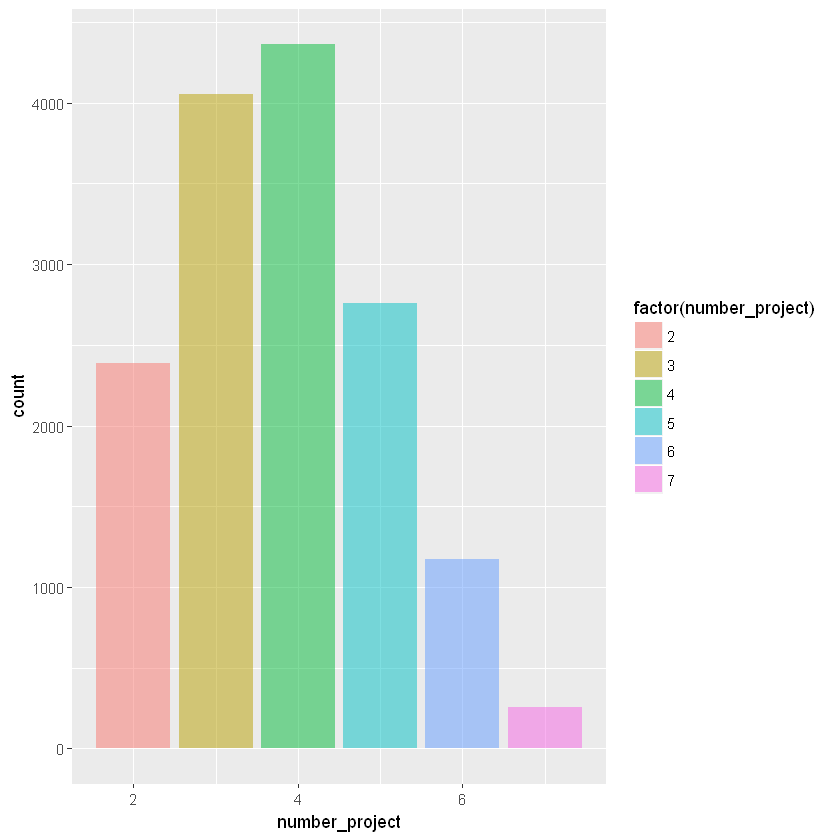

In [6]:
ggplot(df,aes(number_project)) + geom_bar(aes(fill=factor(number_project)),alpha=0.5)


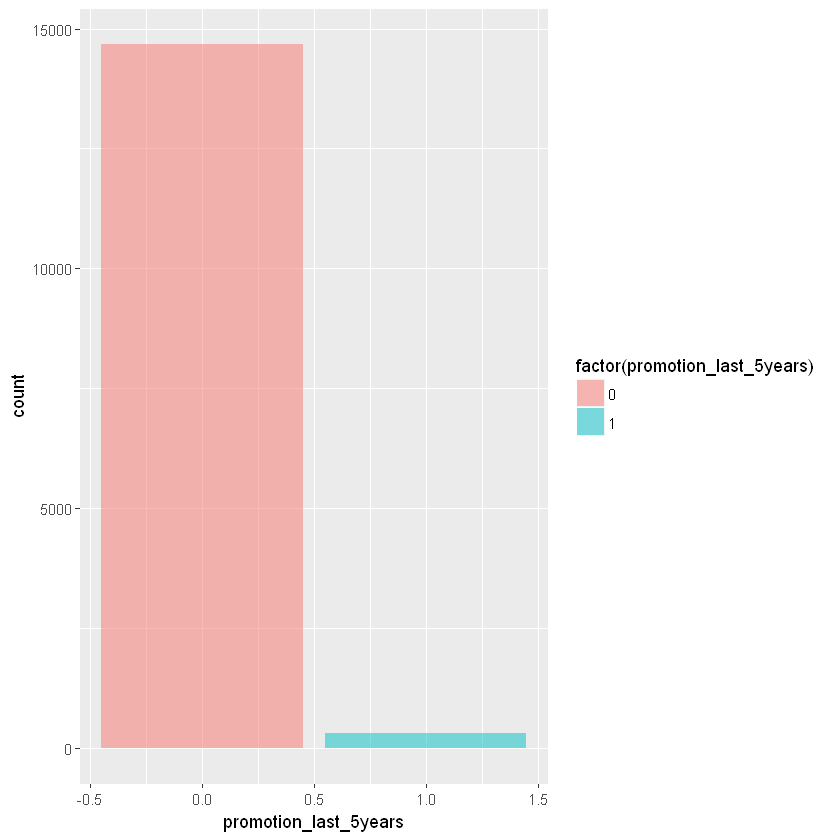

In [7]:
ggplot(df,aes(promotion_last_5years)) + geom_bar(aes(fill=factor(promotion_last_5years)),alpha=0.5)


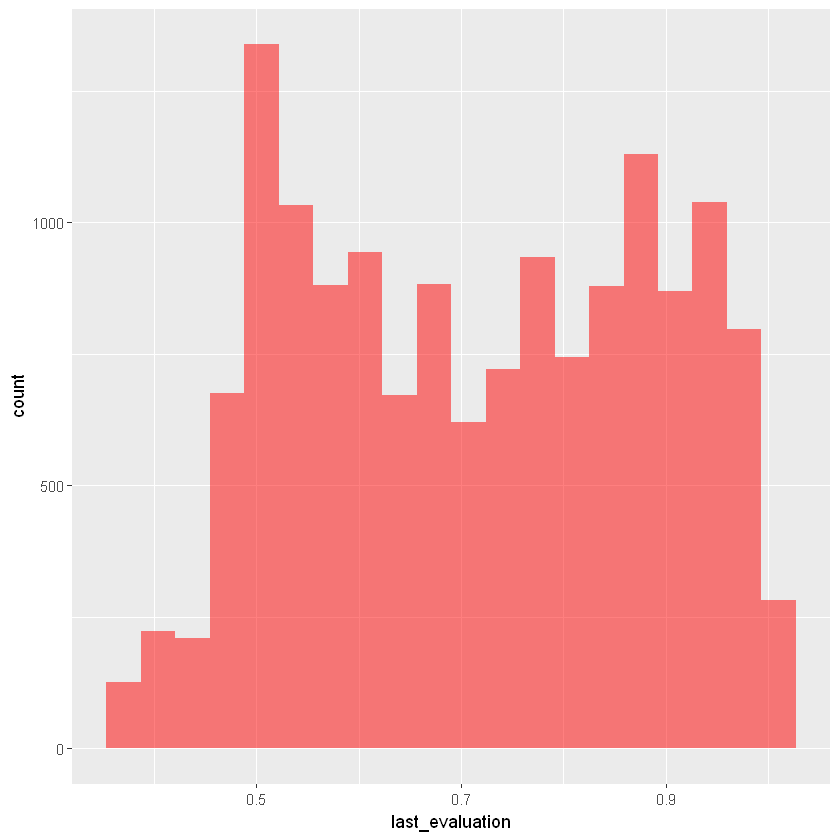

In [10]:
ggplot(df,aes(last_evaluation)) + geom_histogram(fill='red',bins=20,alpha=0.5)


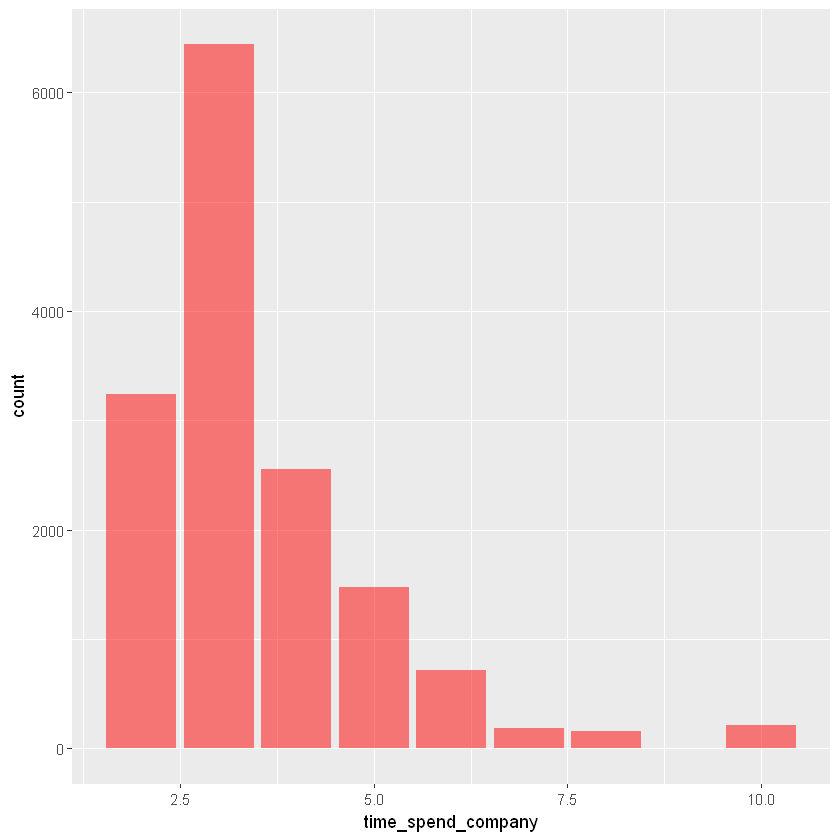

In [11]:
(ggplot(df,aes(time_spend_company)) + geom_bar(fill='red',alpha=0.5))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


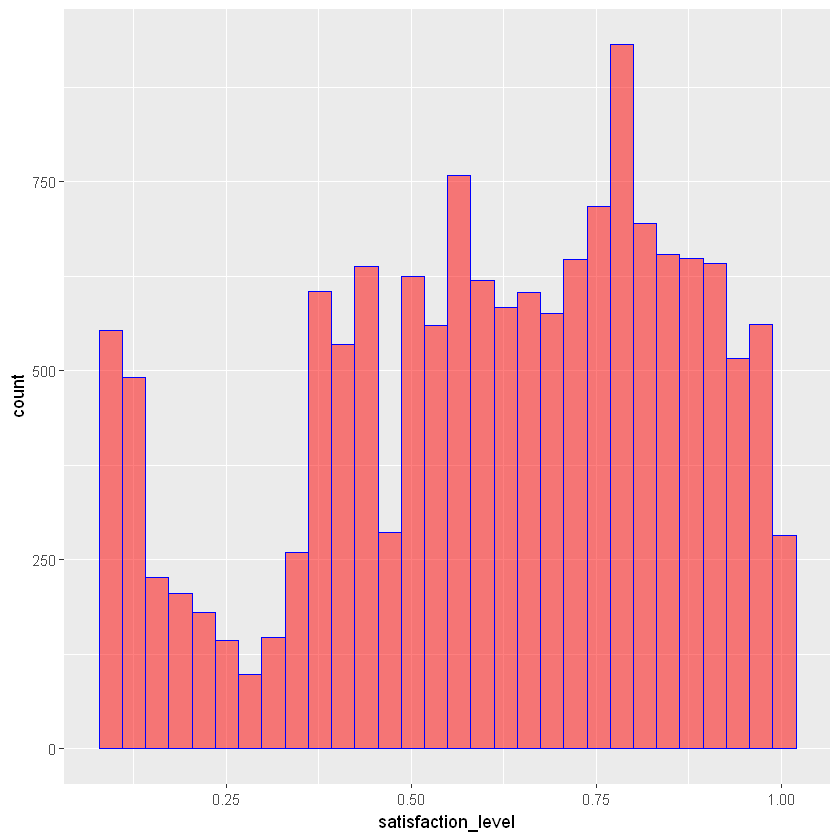

In [12]:
ggplot(df,aes(satisfaction_level)) + geom_histogram(fill='red',color='blue',alpha=0.5)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


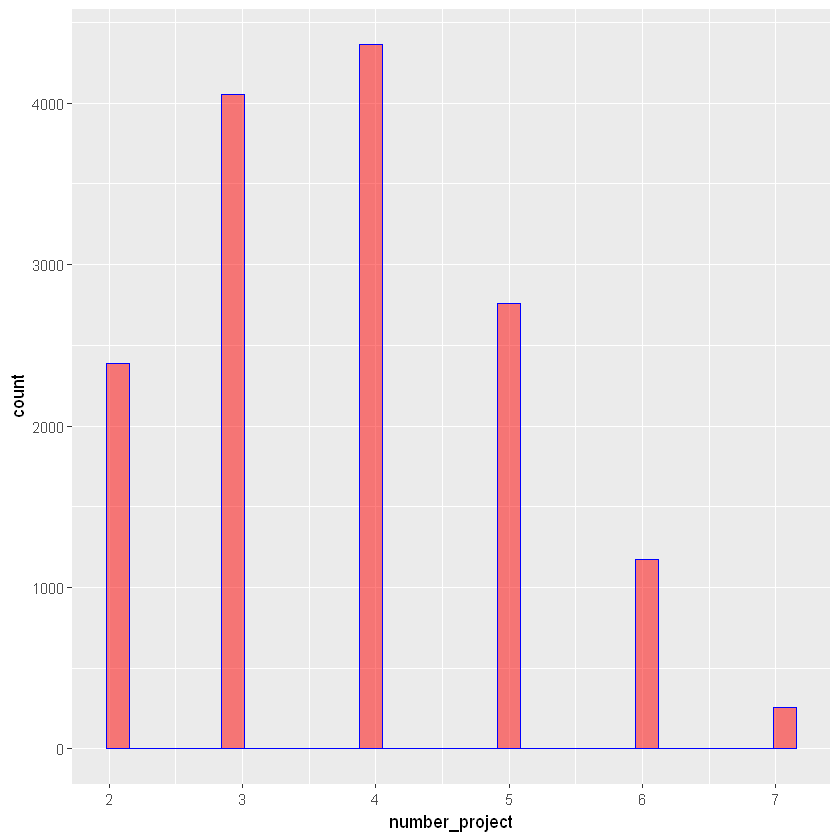

In [13]:
ggplot(df,aes(number_project)) + geom_histogram(fill='red',color='blue',alpha=0.5)


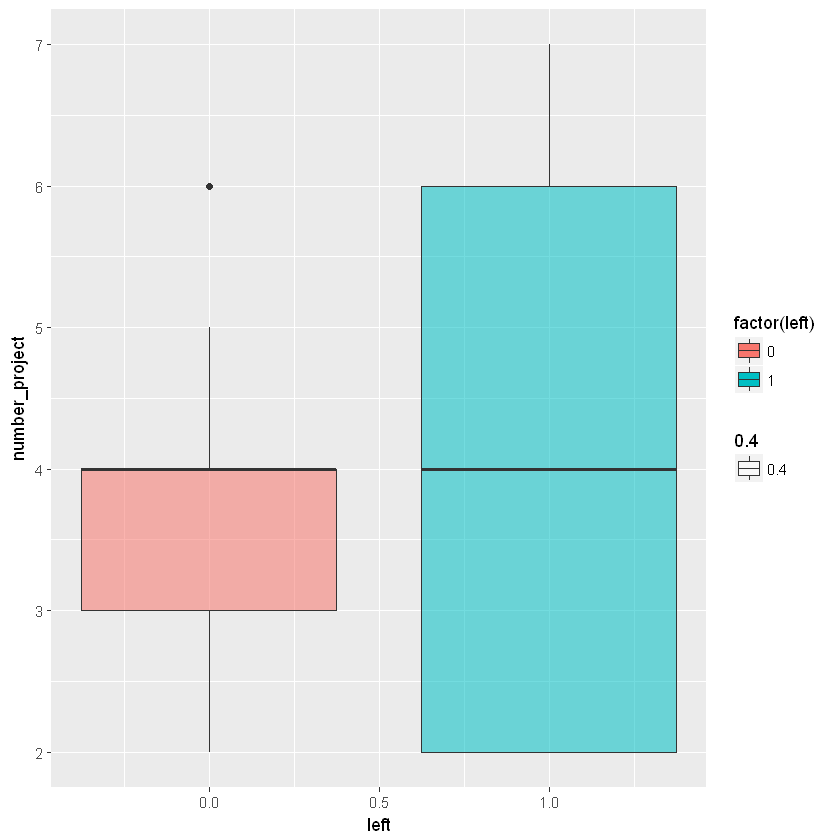

In [16]:
ggplot(df,aes(left,number_project)) + geom_boxplot(aes(group=left,fill=factor(left),alpha=0.4))


In [17]:
# get rid of the first column (serial number)
df <- df[ , 2:ncol(df)]   # or df <- df[ , -1]

# check the new df
head(df, 3)

# see if df has missing values
any(is.na(df)) # false

# identify numerical columns
num_col <- sapply(df, is.numeric)

# derive data frame of numerical columns
df_num <- df[num_col]

# display first 3 rows
head(df_num,3)


last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.53,2,157,3,0,1,0,sales,low
0.86,5,262,6,0,1,0,sales,medium
0.88,7,272,4,0,1,0,sales,medium


[1] FALSE

last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0.53,2,157,3,0,1,0
0.86,5,262,6,0,1,0
0.88,7,272,4,0,1,0


In [19]:
# check if features are correlated (works only on numerical features)
df_cor <- cor(df_num)
df_cor

# seems feature promotion_last_5years is strongly correlated (100%)
findCorrelation(df_cor, cutoff = 0.9) 

# can also find if features are linear combination of others
#findLinearCombos(df_num)


,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
last_evaluation,1.000000000,0.349332589,0.339741800,0.131590722,-0.007104289,0.00656712,-0.008683768
number_project,0.349332589,1.000000000,0.417210634,0.196785891,-0.004740548,0.02378719,-0.006063958
average_montly_hours,0.339741800,0.417210634,1.000000000,0.127754910,-0.010142888,0.07128718,-0.003544414
time_spend_company,0.131590722,0.196785891,0.127754910,1.000000000,0.002120418,0.14482217,0.067432925
Work_accident,-0.007104289,-0.004740548,-0.010142888,0.002120418,1.000000000,-0.15462163,0.039245435
left,0.006567120,0.023787185,0.071287179,0.144822175,-0.154621634,1.00000000,-0.061788107
promotion_last_5years,-0.008683768,-0.006063958,-0.003544414,0.067432925,0.039245435,-0.06178811,1.000000000


integer(0)

In [24]:

# check if variance is very small (near zero variance)
nearZeroVar(df, saveMetrics = TRUE) # everything is OK

         


,freqRatio,percentUnique,zeroVar,nzv
last_evaluation,1.014164,0.43336222,FALSE,FALSE
number_project,1.076449,0.04000267,FALSE,FALSE
average_montly_hours,1.000000,1.43342890,FALSE,FALSE
time_spend_company,1.986128,0.05333689,FALSE,FALSE
Work_accident,5.915168,0.01333422,FALSE,FALSE
left,3.200224,0.01333422,FALSE,FALSE
promotion_last_5years,46.018809,0.01333422,FALSE,TRUE
sales,1.522059,0.06667111,FALSE,FALSE
salary,1.134967,0.02000133,FALSE,FALSE


In [25]:
# set seed to re-generate same random values to split dataset
set.seed(100)

# caret simplifies split for training and testing
df_sampling_vector <- createDataPartition(df$left, p =0.75, list = FALSE)
df_train <- df[df_sampling_vector, ]
df_test <- df[-df_sampling_vector, ]

# verify
head(df_train, 3)
head(df_test, 3)


,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2,0.86,5,262,6,0,1,0,sales,medium
3,0.88,7,272,4,0,1,0,sales,medium
4,0.87,5,223,5,0,1,0,sales,low


,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.53,2,157,3,0,1,0,sales,low
10,0.53,2,142,3,0,1,0,sales,low
11,0.54,2,135,3,0,1,0,sales,low


In [26]:
# keep labels (outputs) for train and test data
df_train_label <- df$left[df_sampling_vector]
head(df_train_label,3)

df_test_label <- df$left[-df_sampling_vector]
head(df_test_label,3)


[1] 1 1 1

[1] 1 1 1

In [27]:
# train a linear model. This means consider left as function of all other features
df <- lm(left ~ ., data = df_train)

# evaluate training model
summary(df)



Call:
lm(formula = left ~ ., data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66768 -0.27671 -0.18339  0.07997  1.01799 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -7.661e-02  2.917e-02  -2.627 0.008636 ** 
last_evaluation       -7.598e-02  2.473e-02  -3.072 0.002131 ** 
number_project        -5.820e-03  3.560e-03  -1.635 0.102140    
average_montly_hours   5.949e-04  8.705e-05   6.834 8.71e-12 ***
time_spend_company     4.575e-02  2.722e-03  16.804  < 2e-16 ***
Work_accident         -1.802e-01  1.091e-02 -16.523  < 2e-16 ***
promotion_last_5years -1.320e-01  2.673e-02  -4.940 7.94e-07 ***
saleshr                5.488e-03  2.407e-02   0.228 0.819623    
salesIT               -4.845e-02  2.142e-02  -2.262 0.023724 *  
salesmanagement       -9.255e-02  2.520e-02  -3.672 0.000241 ***
salesmarketing        -3.735e-02  2.299e-02  -1.625 0.104223    
salesproduct_mng      -4.869e-02  2.301e-02  -2.117 0.

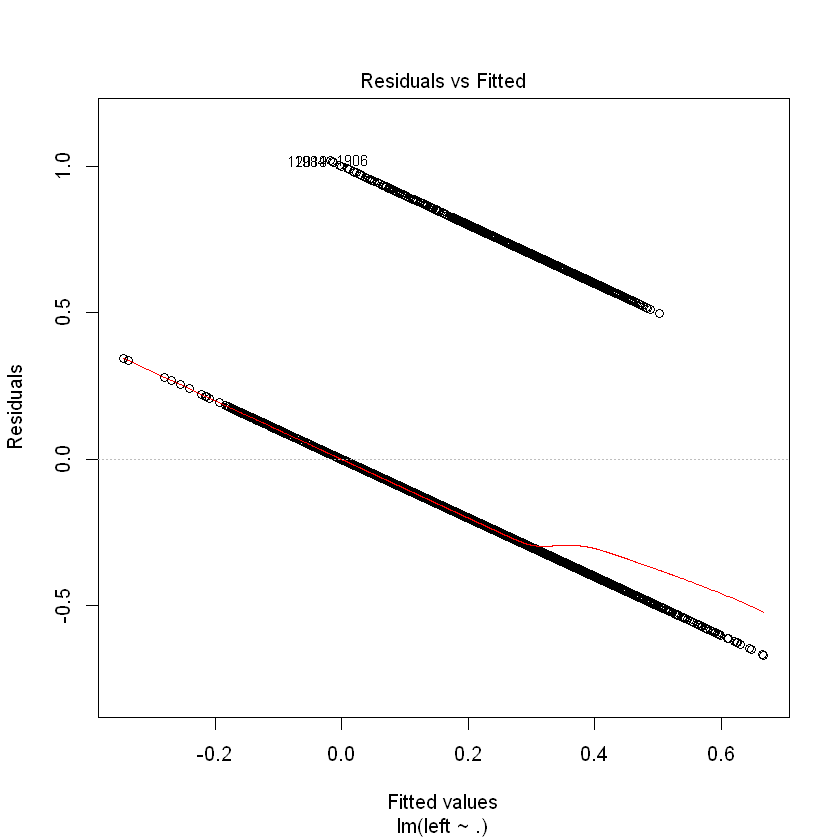

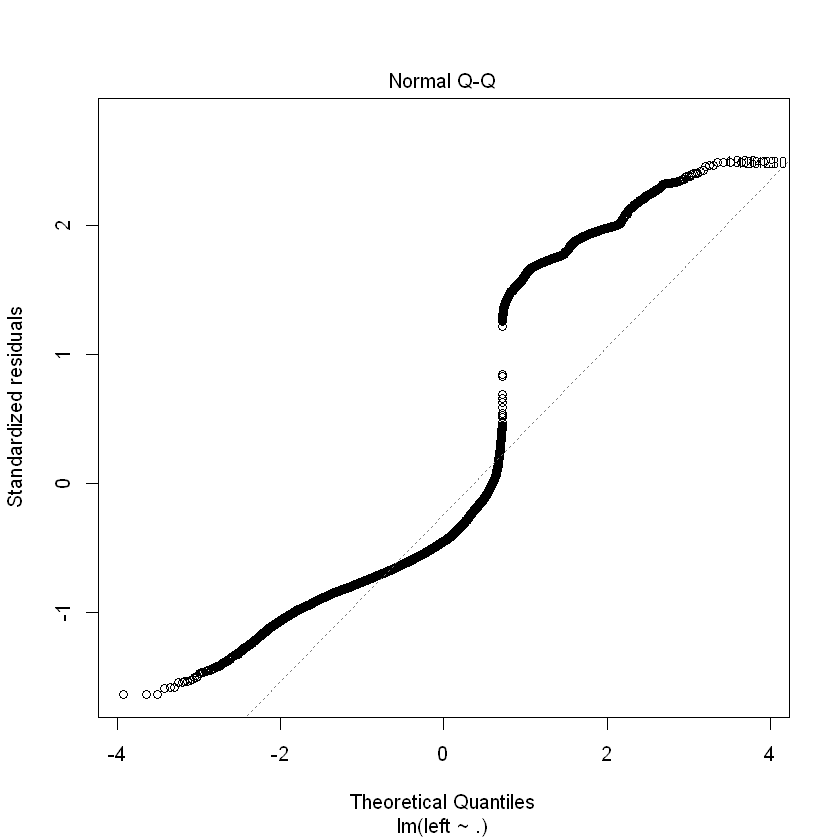

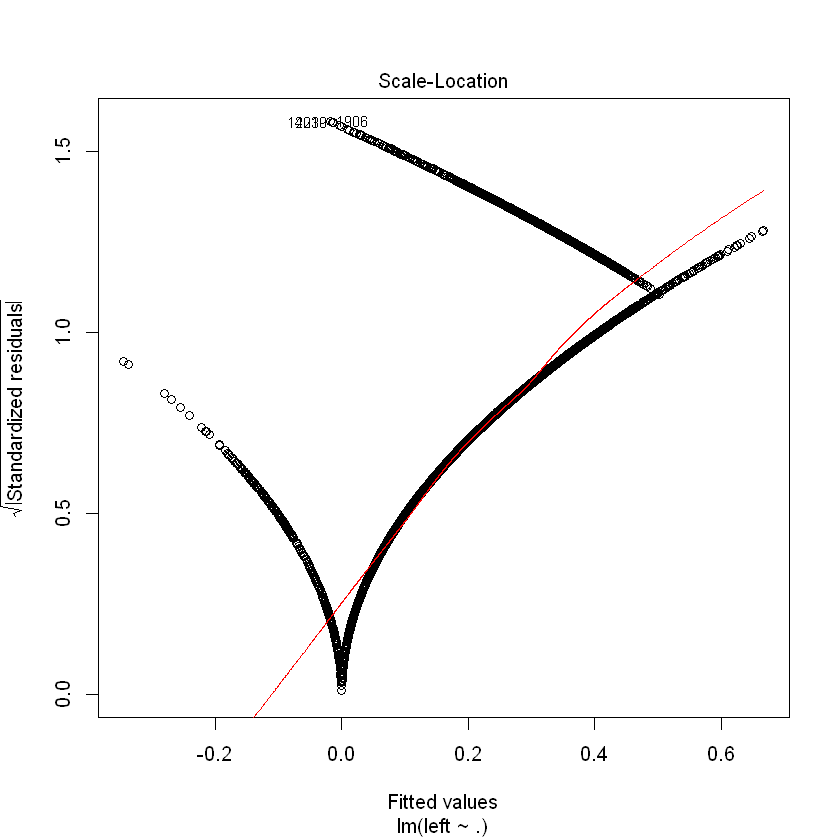

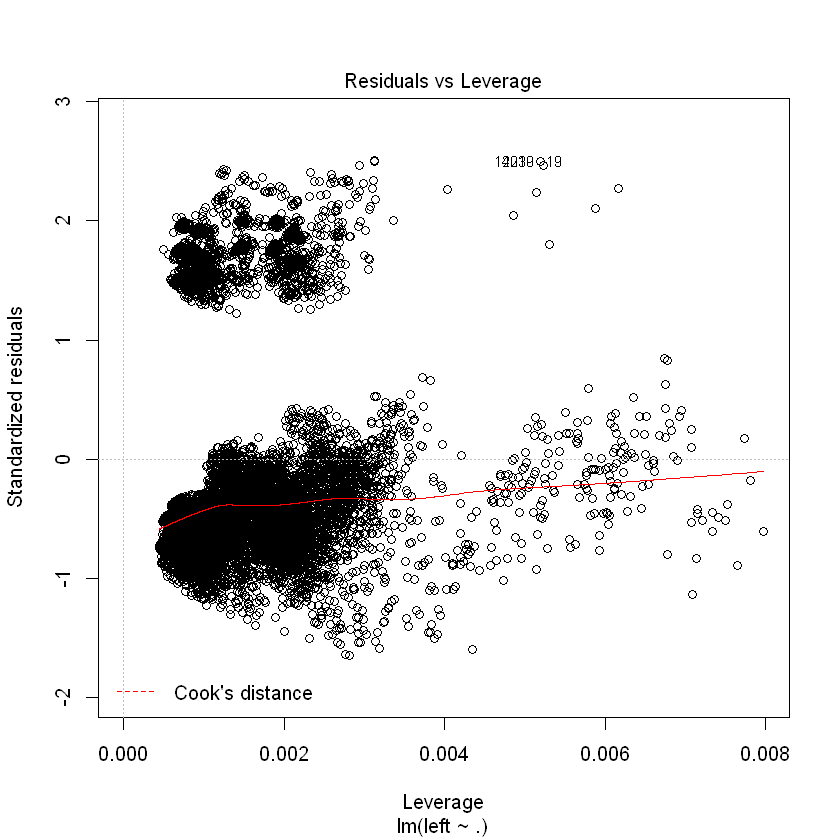

In [28]:
plot(df)


In [32]:
# now predict the test data outputs
employee_pred <- predict(df, df_test)


In [33]:
# define a function to calcculare mean squared errors
compute_mse <- function(predictions, actual) {
mean( (predictions - actual) ^ 2 )
}


In [34]:
# pass the predictions and actual values to test model
mse <- compute_mse(employee_pred, df_test$left) 
# root mean squared error
rmse <- sqrt(mse)
print(paste("MSE: ", mse))
print(paste("RMSE: ", rmse))


[1] "MSE:  0.168223979816478"
[1] "RMSE:  0.410151167030496"


In [35]:
# caret has a function to calculate RMSE and R^2
postResample(pred = employee_pred, obs = df_test$left)


RMSE   Rsquared 
0.41015117 0.08361741

In [36]:
# on how to calculate R2

SSR <- sum((employee_pred - mean(df_test$left))^2)
SSE <- sum((df_test$left - employee_pred)^2)
SST <- SSR + SSE

Rsq <- SSR/SST
Rsq # this looks correct comapred to caret's value

# using approximation (not encouraged)
SSE = sum((employee_pred - df_test$left)^2)
# here, SST is calculated directly
SST = sum( (mean(df_test$left) - df_test$left)^2)

R2 = 1 - SSE/SST
R2
# slight difference


[1] 0.07976251

[1] 0.08343831